In [72]:
#Importing all needed librarys
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pipetorch.train import *
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from tqdm import tqdm

# importing the libraries
import pandas as pd
import numpy as np

# for creating validation set
from sklearn.model_selection import train_test_split


import torchvision
from torchvision.datasets import ImageFolder

In [73]:
#Checking wich GPU is beeing used

!nvidia-smi

Wed Nov 17 14:58:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:05:00.0 Off |                  N/A |
| 29%   26C    P8    18W / 250W |   3066MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:09:00.0 Off |                  N/A |
| 29%   

In [74]:
# #Load data

# #train and test data directory
# data_dir_1 = 'dialogue/Dataset/VoiceDetection/images_medium/images_splitfolders/' #Medium dataset
# data_dir_2 = 'dialogue/Dataset/VoiceDetection/images_hard/images_splitfolders/'   #More difficult dataset

# #load the train and test data
# train_dataset = ImageFolder(data_dir_1 + 'train',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# #Commend if you dont want to use the combination of the two datasets
# train_dataset = train_dataset + ImageFolder(data_dir_2 + 'train',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# test_dataset = ImageFolder(data_dir_1 + 'test',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# #Commend if you dont want to use the combination of the two datasets
# test_dataset = test_dataset + ImageFolder(data_dir_2 + 'test',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# val_dataset = ImageFolder(data_dir_1 + 'val',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# #Commend if you dont want to use the combination of the two datasets
# val_dataset = val_dataset + ImageFolder(data_dir_2 + 'val',transform = transforms.Compose([
#     transforms.Resize((150,150)),transforms.ToTensor()
# ]))
# #train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)#train_set is made into a dataloader, shuffled
# #test_dataloader = DataLoader(test_set, batch_size=32, shuffle=True)

# print(len(train_dataset))
# print(len(test_dataset))
# print(len(test_dataset)/len(test_dataset+train_dataset))

In [75]:
#Load data
data_file = 'dialogue/Dataset/VoiceDetection/Output.npy'
labels = pd.read_csv("dialogue/Dataset/VoiceDetection/boolean_labels.csv")#path to csv
labels.drop(labels.columns[[0]], axis=1, inplace=True)
data = np.load(data_file)
df_temp = pd.DataFrame()
df_data = pd.DataFrame()
#print(data)
df_data = pd.DataFrame(data)
#df_data['data'] = df_temp.values.tolist()
df_data = pd.concat([df_data, labels], axis = 1)
print(df_data)

               0           1           2           3           4           5  \
0       9.434201   18.539894   48.598946   23.656319   68.375114   32.585888   
1       0.988338   56.698444  196.634750  232.387924   96.131500  146.787842   
2      81.516251   74.427246  219.707489  188.375854   51.688900  133.403122   
3      51.164341   88.265450  112.086533   26.646029   34.842381   55.326729   
4     627.108093  546.499390  261.254089  252.623535  181.304245   87.163826   
...          ...         ...         ...         ...         ...         ...   
2295    0.005173    0.001903    0.000578    0.000655    0.001918    0.000928   
2296    0.012230    0.005093    0.000974    0.000938    0.000630    0.000374   
2297    0.000399    0.000461    0.000251    0.000224    0.000169    0.000535   
2298    0.003634    0.001359    0.000729    0.000911    0.000881    0.000750   
2299    0.018530    0.006890    0.001718    0.001063    0.000392    0.001247   

               6           7           

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['isSpeaking'],axis = 1), df_data['isSpeaking'], test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 23)
print(type(X_train))
print(X_train)

<class 'pandas.core.frame.DataFrame'>
           0          1          2         3         4          5     \
1491   0.009871   0.002352   0.000365  0.000094  0.000127   0.000176   
1669   0.000042   0.000390   0.001095  0.000694  0.000532   0.001248   
697   11.513913  26.320082  14.284646  7.371245  4.547209  24.599024   
390    0.099749   0.160753   0.091548  0.020025  0.029059   0.024202   
610    1.405337   0.448070   0.851811  1.229180  0.417285   0.130372   
...         ...        ...        ...       ...       ...        ...   
1786   1.235847   0.313368   0.000447  0.001050  0.000486   0.000411   
756    0.006535   0.005096   0.004808  0.020797  0.029479   0.013534   
790    0.698252   0.818035   0.470060  1.954738  4.752532   3.593133   
2025   0.000263   0.000830   0.000811  0.001023  0.000658   0.001067   
1417   0.025681   0.007224   0.000143  0.000091  0.000266   0.000389   

           6         7         8         9     ...          5622  \
1491   0.000451  0.000479  0.

In [77]:
X_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train.values)
X_test = torch.tensor(X_test.values)
y_test = torch.tensor(y_test.values)
X_val = torch.tensor(X_val.values)
y_val = torch.tensor(y_val.values)
print(X_train.shape, y_train.shape)
#print(test_X.shape)


torch.Size([1472, 5632]) torch.Size([1472])


In [78]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [79]:
class CNN_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(1, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,6)
        )
    
    def forward(self, xb):
        nn.Sigmoid()
        return self.network(xb)

In [80]:
def get_default_device():
    """ Set Device to GPU or CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    

def to_device(data, device):
    "Move data to the device"
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking = True)

class DeviceDataLoader():
    """ Wrap a dataloader to move data to a device """
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        """ Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device)
            
    def __len__(self):
        """ Number of batches """
        return len(self.dl)

In [81]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [82]:
model = CNN_model()
device = get_default_device()
train_dl = DeviceDataLoader(X_train, device)
val_dl = DeviceDataLoader(X_test, device)
to_device(model, device)


CNN_model(
  (network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=82944, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=

In [83]:
model = to_device(CNN_model(),device)

evaluate(model, val_dl)
num_epochs = 150
opt_func = torch.optim.Adam
lr = 0.001

#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

ValueError: too many values to unpack (expected 2)

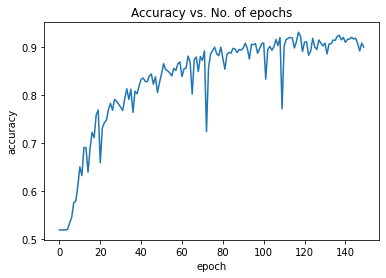

In [ ]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)

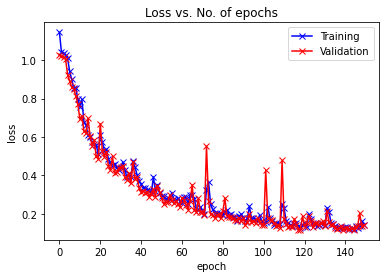

In [ ]:
def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [ ]:
# Apply the model on test dataset and Get the results
test_loader = DeviceDataLoader(DataLoader(val_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.9642224311828613, 'val_acc': 0.80078125}

FileNotFoundError: [Errno 2] No such file or directory: 'dialogue/Dataset/VoiceDetection/images/images_splitfolders/val/True/1113_True_dataset_with_negatives_spectro.png'

In [ ]:
#Shutting down the notebook

%%javascript
Jupyter.notebook.session.delete();

UsageError: Line magic function `%%javascript` not found.
